In [ ]:
"""
Taylor Richardson
December 12, 2018.

I used a Support Vector Machine (SVM) to classify the test data points as either having a positive or negative outcome.

The outcome variable denoted a 0 if the student didn't perform better on the next test than on a previous test, and 1 if they did perform better than previously.

It showed the most effective method for a positive outcome variable was method 1.

The model itself is fairly inaccurate at only 50% roughly. 

This is likely due to the low amount of data to train and test on.

"""

In [2]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
#Load dataset
studentPerf = pd.read_csv("./studentperf.csv")

In [4]:
#Define x and y variables
x = studentPerf.drop('Outcome', axis = 1)
y = studentPerf['Outcome']

In [5]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [2]:
#Show the top 5 entries in the dataset
studentPerf.head(5)

NameError: name 'studentPerf' is not defined

In [9]:
#Describe the data
studentPerf.describe()

,Method,satis,time,ability,prvperf,Outcome
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,4.966667,18.533333,29.216667,22.796667,0.450000
std,0.823387,1.813010,3.586541,11.295854,3.262367,0.501692
min,1.000000,1.000000,12.000000,7.000000,16.000000,0.000000
25%,1.000000,4.000000,16.000000,22.000000,20.375000,0.000000
50%,2.000000,5.000000,18.000000,29.500000,22.700000,0.000000
75%,3.000000,6.000000,22.000000,37.250000,25.225000,1.000000
max,3.000000,9.000000,26.000000,49.000000,32.800000,1.000000


In [6]:
#Determine the average outcome by method groups
methodAverages = studentPerf.groupby('Method').Outcome.mean()
methods = [1, 2, 3]
methodAverages

Method
1    0.65
2    0.45
3    0.25
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Average Score by Method')

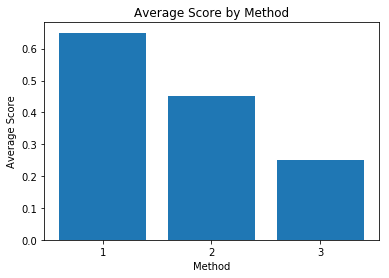

In [7]:
#Plot a bar chart that shows the average outcome score for each of the test methods
plt.bar(methods, methodAverages, align='center')
plt.xticks(methods, methods)
plt.ylabel('Average Score')
plt.xlabel('Method')
plt.title('Average Score by Method')

In [10]:
#Generate SVM Model
from sklearn.svm import SVC
svcmodel = SVC(kernel='linear')
svcmodel.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
#Predictions
Y_pred = svcmodel.predict(X_test)

In [12]:
#Accuracy Score
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.5


In [13]:
#Evaluate the algorithm
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['Negative Change', 'Positive Change']
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

[[4 4]
 [2 2]]
                 precision    recall  f1-score   support

Negative Change       0.67      0.50      0.57         8
Positive Change       0.33      0.50      0.40         4

    avg / total       0.56      0.50      0.51        12

